<a href="https://colab.research.google.com/github/Jeeyaa/Email-spam-Classification/blob/main/Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import matplotlib.pyplot as plt
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv')

##Preprocessing of Data

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.shape

(5171, 7)

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words,num_sentences
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


# Transforming text by :-
## 1) converting to lower case
## 2) tokenizing
## 3) removing stop words and special charectars
## 4) removing punctuations
## 5) stemming

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)


In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


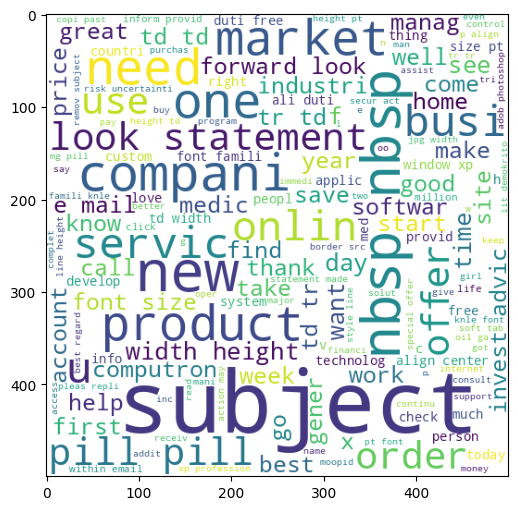

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['label_num'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

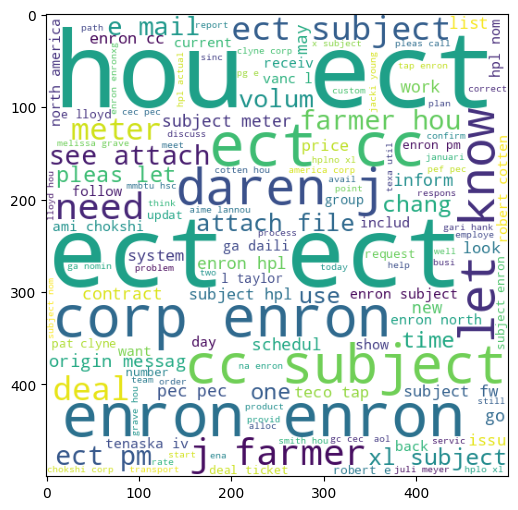

In [ ]:
ham_wc = wc.generate(df[df['label_num'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# Creating model

In [ ]:
tfidf = TfidfVectorizer(max_features=3500)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label_num'].values

In [ ]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=2)
mnb = MultinomialNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

# Multinomial Naive Bayes

In [ ]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))

Accuracy is 0.9487922705314009
Precision is 0.8710691823899371


#Support Vector Classifier

In [ ]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))

Accuracy is 0.9845410628019323
Precision is 0.9565217391304348


#K Nearest neighbor


In [ ]:
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))

Accuracy is 0.9710144927536232
Precision is 0.9675090252707581


#Extra Tree Classifier

In [ ]:
etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))

Accuracy is 0.9797101449275363
Precision is 0.9466666666666667


#Random Forest Classifier

In [ ]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))

Accuracy is 0.9797101449275363
Precision is 0.9466666666666667


In [ ]:
algorithms = ['Multinomial Naive Bayes','Support Vector Classifier','K-Nearest Neighbor','Extra Tree Classifier','Random Forest Classifier']
accuracy = [0.9487922705314009,0.9845410628019323,0.9710144927536232,0.9797101449275363,0.9797101449275363]
precision = [0.8710691823899371,0.9565217391304348,0.9675090252707581,0.9466666666666667,0.9466666666666667]

In [ ]:
performance_df = pd.DataFrame()

performance_df['Algorithms'] = algorithms
performance_df['Accuracy'] = accuracy
performance_df['Precision'] = precision
performance_df.head()

,Algorithms,Accuracy,Precision
0,Multinomial Naive Bayes,0.948792,0.871069
1,Support Vector Classifier,0.984541,0.956522
2,K-Nearest Neighbor,0.971014,0.967509
3,Extra Tree Classifier,0.979710,0.946667
4,Random Forest Classifier,0.979710,0.946667


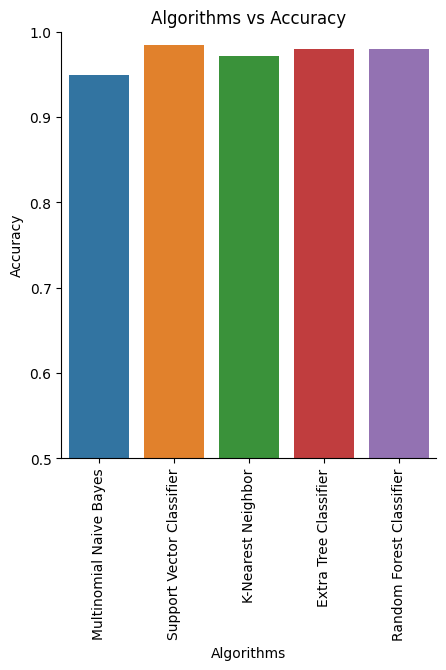

In [ ]:
sns.catplot(x ='Algorithms' , y='Accuracy',data=performance_df, kind='bar',height=5)
plt.ylim(0.5, 1.0)
plt.title('Algorithms vs Accuracy')
plt.xticks(rotation='vertical')
plt.show()

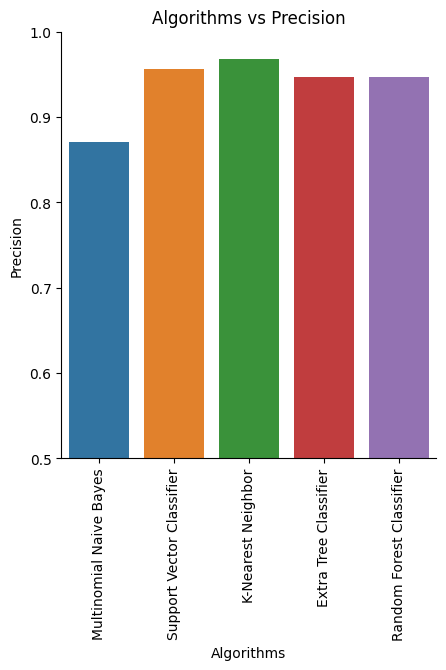

In [ ]:
sns.catplot(x = 'Algorithms', y='Precision',data=performance_df, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.title('Algorithms vs Precision')
plt.xticks(rotation='vertical')
plt.show()